

#      FACE RECOGNITION USING CONVOLUTIONAL NEURAL NETWORK(CNN)










**Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split
import os
from sklearn.utils import shuffle
from keras import optimizers
import keras
from keras import Sequential

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/IMAGES'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/IMAGES


In [0]:
inp_shape = (256,256)

def import_images(folder):
    input_shape = (256,256)
    images = []
    path  = '/gdrive/My Drive/IMAGES/'+folder
    for filename in os.listdir(folder):
        img = plt.imread(path+"/"+filename) 
        img = cv2.resize(img,input_shape)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = gray/255
        images.append(gray)  
    return images

In [0]:
class0 = import_images("CLASS0")
class1 = import_images("CLASS1")

In [0]:
#converting list to array
#we need to convert to array because further computation would be 
#simple if the data of  array type
sample_0 = np.array(class0)
sample_1 = np.array(class1)

In [0]:
#getting variables for further computation
size_class_0 = len(sample_0)
size_class_1 = len(sample_1)
total_size = size_class_0 + size_class_1


In [0]:
print("Shape of Images Class 0:",sample_0.shape)
print("Shape of Images Class 1:",sample_1.shape)

Shape of Images Class 0: (500, 256, 256)
Shape of Images Class 1: (500, 256, 256)


In [0]:
print("Size of Images Class 0:",size_class_0)
print("Size of Images Class 1:",size_class_1)
print("TOTAL SIZE OF DATA:",total_size)

Size of Images Class 0: 500
Size of Images Class 1: 500
TOTAL SIZE OF DATA: 1000


In [0]:
print("NUMBER OF DATA ITEMS IN CLASS 0:" ,len(sample_0))
print("NUMBER OF DATA ITEMS IN CLASS 1:" ,len(sample_1))


NUMBER OF DATA ITEMS IN CLASS 0: 500
NUMBER OF DATA ITEMS IN CLASS 1: 500


In [0]:
images = []


#converting list into array
sample_0 = (sample_0).reshape(len(sample_0),256,256,1)

for im in sample_0:
  a = im.flatten();
  images.append(a);
  
sample_np = (sample_1).reshape(len(sample_1),256,256,1)



for im in sample_1:
  a = im.flatten();

  images.append(a);

In [0]:
#pass a number to display image
def disp_img(str):
  if(images[str].shape == inp_shape):
    plt.imshow(images[str])
  else:
    plt.imshow(images[str].reshape(inp_shape))

In [0]:
#creating output labels
labels = np.zeros(len(sample_0)+len(sample_1))
labels[len(sample_0):((len(sample_0))+(len(sample_1)))] = 1

In [0]:
#shuffling data
data_1,label = shuffle(images,labels,random_state = 2)

In [0]:
#creating a dataset
data = [data_1,label]

In [0]:
#creating x and y
x = data[0]
y = data[1]

In [0]:
#splitting of dataset -- train and test
#80% data as training data and 20% data as testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [0]:
#converting to array
x_train = np.array(x_train)
x_test = np.array(x_test)

In [0]:
print("Shape of training images : ",x_train.shape)
print("Shape of training labels : ",y_train.shape)
print("Shape of testing images : ",x_test.shape)
print("Shape of testing labels : ",y_test.shape)
print("Size of training images :",len(x_train))
print("Size of training labels :",len(y_train))
print("Size of test images :",len(x_test))
print("Size of test labels :",len(y_test))

Shape of training images :  (800, 65536)
Shape of training labels :  (800,)
Shape of testing images :  (200, 65536)
Shape of testing labels :  (200,)
Size of training images : 800
Size of training labels : 800
Size of test images : 200
Size of test labels : 200


In [0]:
x_train = x_train.reshape(x_train.shape[0],256,256,1)
x_test = x_test.reshape(x_test.shape[0],256,256,1)

In [0]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

# **CONVOLUTIONAL NEURAL NETWORK**

In [0]:

from numpy.random import seed
def model_check(act,optimi,epochs,batch,seed_val):

    batch_size= batch
    i = seed_val
    print("ACTIVATION FUNCTION :",act)
    print("OPTIMIZER :",optimi)
    print("THE VALUE OF SEED IS :",i)
    train_accuracy = []

   
    model = Sequential()
    model.add(Conv2D(32,input_shape=(256,256,1),kernel_size=(3,3),strides=1,padding="same",activation=act))
    model.add(Conv2D(32,input_shape=(256,256,1),kernel_size=(3,3),strides=1,padding="same",activation=act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    seed(i)
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd", metrics=['accuracy'])
    model_re =  model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
  
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax1.plot(model_re.history['acc'])
    ax1.plot(model_re.history['val_acc'])
    ax1.set_xlabel('EPOCHS')
    ax1.set_ylabel('ACCURACY')
    ax1.set_title("EPOCHS VS ACCURACY")
    ax1.legend(["Training Accuracy","Validation Accuracy"])

    ax2 = fig.add_subplot(122)
    ax2.plot(model_re.history['loss'])
    ax2.plot(model_re.history['val_loss'])
    ax2.set_xlabel('EPOCHS')
    ax2.set_ylabel('LOSS')
    ax2.set_title("EPOCHS VS LOSS")
    ax2.legend(["Training Loss","Validation Loss"])

    plt.show()




    

    data = pd.DataFrame([model_re.history['acc'],model_re.history['val_acc'],model_re.history['loss'],model_re.history['val_loss']]).T
    data = data.rename(columns = {0:"TRAIN ACC",1:"VAL ACC",2:"TRAIN LOSS",3:"VAL LOSS"})
    print(data)
    return model
    
   

ACTIVATION FUNCTION : sigmoid
OPTIMIZER : SGD
THE VALUE OF SEED IS : 2
Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 5s 6ms/step - loss: 0.7972 - acc: 0.5100 - val_loss: 0.6931 - val_acc: 0.5050
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7675 - acc: 0.4663 - val_loss: 0.6973 - val_acc: 0.5050
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7368 - acc: 0.5350 - val_loss: 0.6943 - val_acc: 0.4950
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7529 - acc: 0.4750 - val_loss: 0.6968 - val_acc: 0.5050
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7421 - acc: 0.5225 - val_loss: 0.6937 - val_acc: 0.5050
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7275 - acc: 0.5087 - val_loss: 0.6947 - val_acc: 0.5050
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7255 - acc: 0.4

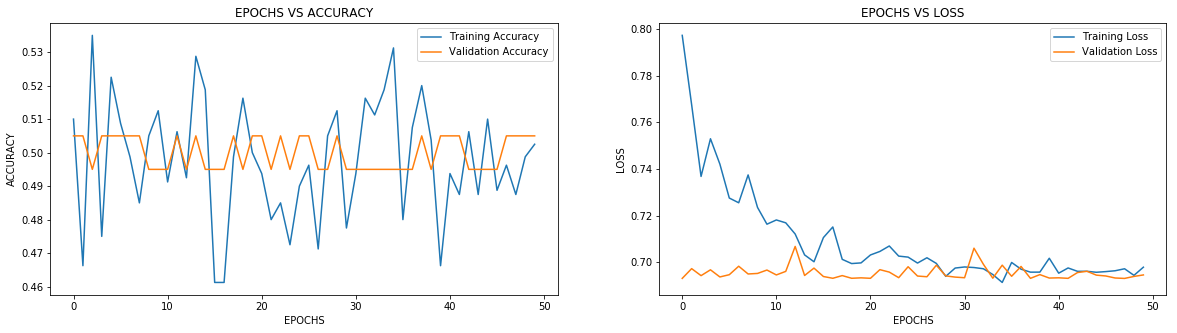

    TRAIN ACC  VAL ACC  TRAIN LOSS  VAL LOSS
0     0.51000    0.505    0.797202  0.693110
1     0.46625    0.505    0.767472  0.697287
2     0.53500    0.495    0.736776  0.694288
3     0.47500    0.505    0.752918  0.696782
4     0.52250    0.505    0.742052  0.693723
5     0.50875    0.505    0.727527  0.694689
6     0.49875    0.505    0.725496  0.698318
7     0.48500    0.505    0.737423  0.694998
8     0.50500    0.495    0.723503  0.695231
9     0.51250    0.495    0.716320  0.696682
10    0.49125    0.495    0.718134  0.694585
11    0.50625    0.505    0.716908  0.696114
12    0.49250    0.495    0.712113  0.706795
13    0.52875    0.505    0.703173  0.694354
14    0.51875    0.495    0.700228  0.697513
15    0.46125    0.495    0.710582  0.693913
16    0.46125    0.495    0.715136  0.693154
17    0.49875    0.505    0.701263  0.694308
18    0.51625    0.495    0.699457  0.693154
19    0.50000    0.505    0.699744  0.693345
20    0.49375    0.505    0.703145  0.693143
21    0.48

In [0]:
model  = model_check("sigmoid","SGD",50,25,2)

In [0]:
prediction = []
original_label = [] 
non_prashanth_prob = [] 
prashanth_prob = []
def test(image_folder,model):
  
  
  i =0
  import_test = "/gdrive/My Drive/IMAGES/"+image_folder
  img_folder_1 = os.listdir(import_test)
  for img in img_folder_1:
    res_image = cv2.imread(import_test+"/"+img)
    gray = cv2.cvtColor(res_image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,inp_shape)
    gray = gray.reshape((1,256,256,1))
    a= model.predict(gray)
    prediction.append(a)
    non_prashanth_prob.append(prediction[i][0][0]*100)
    prashanth_prob.append(prediction[i][0][1]*100)
    i =i+1
    
  
  